In [6]:
from resemblyzer import preprocess_wav, VoiceEncoder
from pathlib import Path

#give the file path to your audio file
audio_file_path = '/home/dhruv04/Downloads/ASR.wav'
wav_fpath = Path(audio_file_path)

wav = preprocess_wav(wav_fpath)
encoder = VoiceEncoder("cpu")
_, cont_embeds, wav_splits = encoder.embed_utterance(wav, return_partials=True, rate=16)
print(cont_embeds.shape)

Loaded the voice encoder model on cpu in 0.02 seconds.
(1527, 256)


In [7]:
from spectralcluster import RefinementOptions
from spectralcluster import SpectralClusterer

refinement_operations = RefinementOptions(
    p_percentile=0.90,
    gaussian_blur_sigma=1
)

clusterer = SpectralClusterer(
    min_clusters=2,
    max_clusters=100,
    refinement_options=refinement_operations
)

labels = clusterer.predict(cont_embeds)

In [8]:
def create_labelling(labels,wav_splits):
    from resemblyzer import sampling_rate
    times = [((s.start + s.stop) / 2) / sampling_rate for s in wav_splits]
    labelling = []
    start_time = 0
    for i,time in enumerate(times):
        if i>0 and labels[i]!=labels[i-1]:
            temp = [str(labels[i-1]),start_time,time]
            labelling.append(tuple(temp))
            start_time = time
        if i==len(times)-1:
            temp = [str(labels[i]),start_time,time]
            labelling.append(tuple(temp))

    return labelling
labelling = create_labelling(labels,wav_splits)

In [9]:
print(labelling)

[('1', 0, 1.94), ('0', 1.94, 2.3), ('1', 2.3, 2.6), ('0', 2.6, 3.14), ('1', 3.14, 6.02), ('0', 6.02, 6.5), ('1', 6.5, 6.74), ('0', 6.74, 6.8), ('1', 6.8, 8.42), ('0', 8.42, 9.5), ('1', 9.5, 9.56), ('0', 9.56, 9.62), ('1', 9.62, 9.92), ('0', 9.92, 9.98), ('1', 9.98, 10.1), ('0', 10.1, 10.34), ('1', 10.34, 11.6), ('0', 11.6, 11.66), ('1', 11.66, 11.72), ('0', 11.72, 12.56), ('1', 12.56, 14.9), ('0', 14.9, 15.08), ('1', 15.08, 15.2), ('0', 15.2, 15.26), ('1', 15.26, 15.32), ('0', 15.32, 18.02), ('1', 18.02, 19.64), ('0', 19.64, 25.04), ('1', 25.04, 27.86), ('0', 27.86, 27.92), ('1', 27.92, 27.98), ('0', 27.98, 28.04), ('1', 28.04, 28.34), ('0', 28.34, 28.82), ('1', 28.82, 30.56), ('0', 30.56, 30.86), ('1', 30.86, 30.92), ('0', 30.92, 31.16), ('1', 31.16, 31.58), ('0', 31.58, 31.76), ('1', 31.76, 31.82), ('0', 31.82, 32.0), ('1', 32.0, 32.18), ('0', 32.18, 32.24), ('1', 32.24, 32.3), ('0', 32.3, 32.36), ('1', 32.36, 32.48), ('0', 32.48, 32.54), ('1', 32.54, 32.66), ('0', 32.66, 34.52), ('1

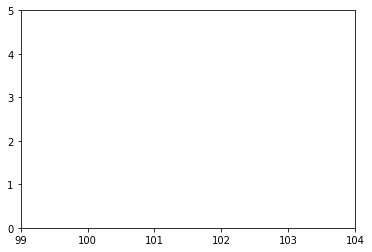

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

fig, ax = plt.subplots()
y = []
x = []

for element in labelling:
    y.append(1+int(element[0]))
    y.append(1+int(element[0]))
    x.append(element[1])
    x.append(element[2])

ax.plot(x, y)
ax.set_ylim(0, 5)

def animate(frame):
   ax.set_xlim(left=frame, right=frame+5)

ani = animation.FuncAnimation(fig, animate)

from IPython.display import HTML
HTML(ani.to_jshtml())

